In [199]:
import pandas as pd

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
sns.__version__

'0.11.0'

In [203]:
df = pd.read_csv("Cartwheeldata.csv")

In [204]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


# Exploratory data visualization

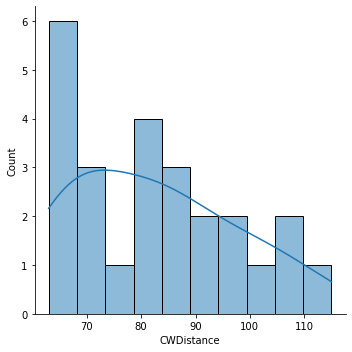

In [54]:
# Histogram
sns.displot(data=df, x="CWDistance", kde = True, bins=10)

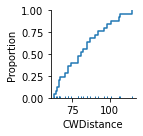

In [77]:
# CDF plot
sns.displot(data=df, x="CWDistance", kind = 'ecdf', rug=True, height=2)

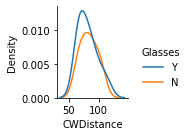

In [74]:
sns.displot(df, x="CWDistance", kind="kde", hue="Glasses", height=2)

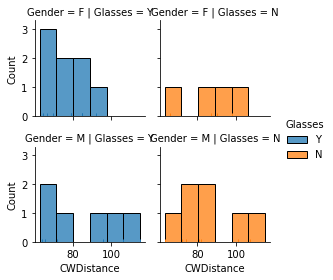

In [80]:
sns.displot(df, x="CWDistance", hue="Glasses", col='Glasses', row='Gender',  rug=True, height=2)

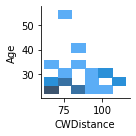

In [72]:
sns.displot(df, x="CWDistance", y="Age", height=2)

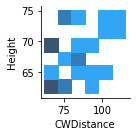

In [73]:
sns.displot(df, x="CWDistance", y="Height", height=2)

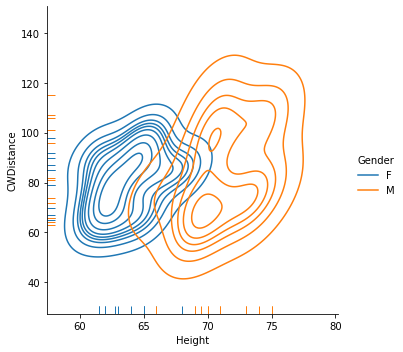

In [88]:
sns.displot(df, x="Height", y="CWDistance", kind="kde", hue="Gender", rug=True)

<AxesSubplot:xlabel='Height', ylabel='CWDistance'>

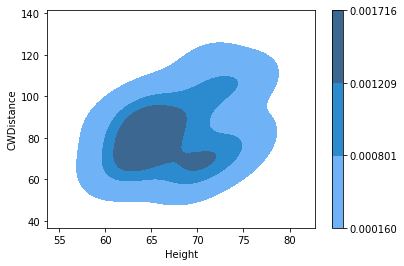

In [107]:
sns.kdeplot(x=df.Height, y=df.CWDistance,  n_levels=4, shade=True, thresh=0.05, cbar=True)

In [137]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(df[['CWDistance','Age', 'Height','Gender']], hue='Gender', height=height, aspect=aspect)
    
interactive(size_widget, height=(1,3.5,0.5), aspect=(0.5,2,0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

<AxesSubplot:xlabel='Gender', ylabel='Height'>

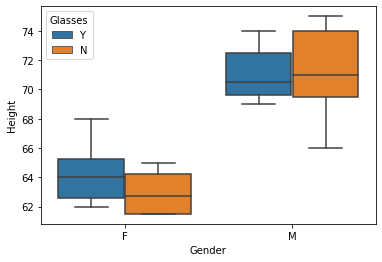

In [154]:
sns.boxplot(data=df, y='Height', x = 'Gender', hue = "Glasses", showcaps=True)
# https://www.youtube.com/watch?v=Vo-bfTqEFQk

<AxesSubplot:xlabel='Gender', ylabel='Height'>

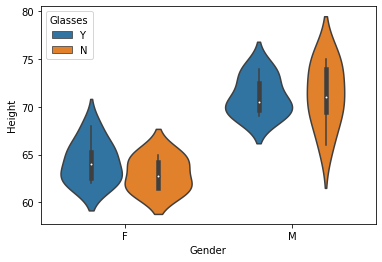

In [149]:
sns.violinplot(data=df, y='Height', x = 'Gender', hue = "Glasses")
# https://www.youtube.com/watch?v=Vo-bfTqEFQk

<AxesSubplot:xlabel='Gender', ylabel='Height'>

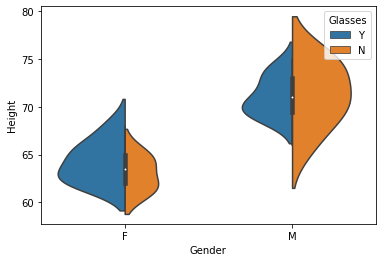

In [153]:
sns.violinplot(data=df, y='Height', x = 'Gender', hue = "Glasses",  split=True, scale='count', scale_hue=False)
# https://www.youtube.com/watch?v=Vo-bfTqEFQk

In [159]:
df[['CWDistance','Age', 'Height','Gender','GenderGroup','GlassesGroup']].corr()

,CWDistance,Age,Height,GenderGroup,GlassesGroup
CWDistance,1.000000,0.050718,0.325923,0.145213,-0.074933
Age,0.050718,1.000000,-0.239995,-0.223526,0.172260
Height,0.325923,-0.239995,1.000000,0.849203,-0.127138
GenderGroup,0.145213,-0.223526,0.849203,1.000000,-0.206456
GlassesGroup,-0.074933,0.172260,-0.127138,-0.206456,1.000000


<AxesSubplot:>

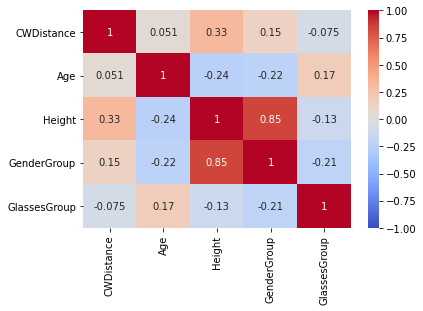

In [167]:
sns.heatmap(  df[['CWDistance','Age', 'Height','Gender','GenderGroup','GlassesGroup']].corr() 
            , cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

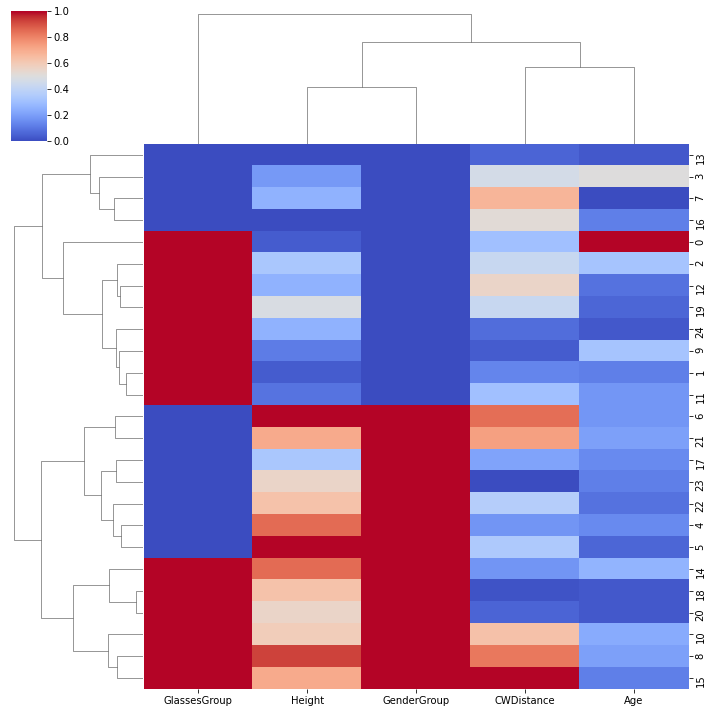

In [177]:
sns.clustermap(  df[['CWDistance','Age', 'Height','GenderGroup','GlassesGroup']]
               , standard_scale=1, cmap='coolwarm' ) 
# method='single' gives single linkage

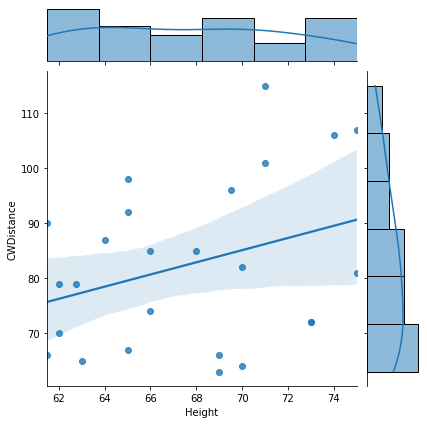

In [187]:
sns.jointplot(data=df, y='CWDistance', x='Height', kind='reg')
#kind = scatter, kde, reg, hist
# method='single' gives single linkage

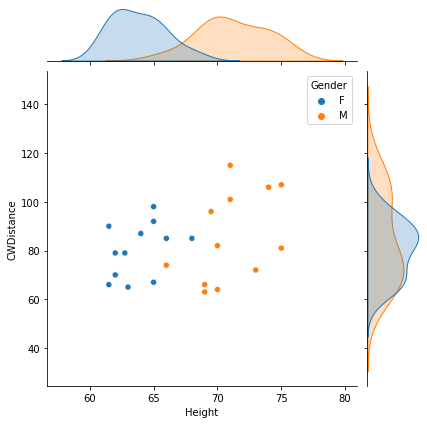

In [189]:
sns.jointplot(data=df, y='CWDistance', x='Height', hue='Gender')
# kind = scatter, kde, reg, hist
# pallet for changing color

In [190]:
df.columns

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')

<AxesSubplot:ylabel='CWDistance'>

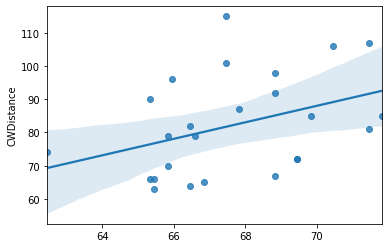

In [198]:
sns.regplot(data=df, x='Height',y='CWDistance', robust=True, x_partial='GenderGroup')
# https://www.youtube.com/watch?v=Smh7ujDbYyg
# order = 2,3,4 (polynomial regression)
# robust
# logistic
# lowess
# x_partial : to control for a confounding variable


In [221]:
# https://www.youtube.com/watch?v=CMRVEKf9jWA (for line plots, bootstrap on confidence intervals)
# https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip saved as 'timeseries.csv'
df_ts = pd.read_csv("timeseries.csv", parse_dates=[3])
df_ts.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df_ts['Day'] = df_ts.Timestamp.dt.date
df_ts['Month'] = df_ts.Timestamp.dt.month
df_ts['Hour'] = df_ts.Timestamp.dt.hour
df_ts.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016-10-04,10,7
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016-10-04,10,8
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016-10-04,10,8
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,2016-10-04,10,9
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,2016-10-04,10,9


<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

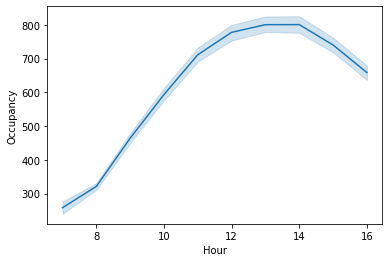

In [222]:
sns.lineplot(x='Hour', y='Occupancy', data=df_ts, n_boot=1000, estimator='mean')

<AxesSubplot:xlabel='Day', ylabel='Occupancy'>

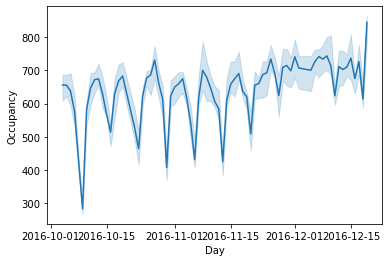

In [233]:
sns.lineplot(x='Day', y='Occupancy', data=df_ts, n_boot=10)

<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

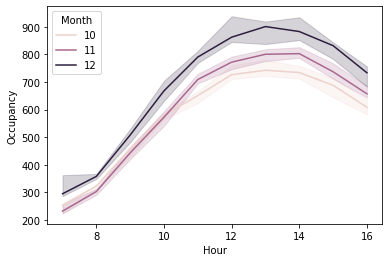

In [234]:
sns.lineplot(x='Hour', y='Occupancy', data=df_ts, n_boot=10, hue='Month')
# estimator = 'median'